In [70]:
from OpenSSL import crypto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import os
import time
import datetime
import statistics as stat

In [71]:
phish_df = pd.read_csv('final_certificate_datasets/phish_dataset.csv')
benign_df = pd.read_csv('final_certificate_datasets/benign_certs.csv')
benign_df.drop_duplicates(subset=['CN'],inplace=True)
phish_df2 = pd.read_csv('final_certificate_datasets/phish_harsh_subset.csv')
phish_df3 =  pd.read_csv('final_certificate_datasets/phish_dataset_urls.csv')
benign_df2 = pd.read_csv('final_certificate_datasets/benign_unpopular.csv')
benign_df2.drop_duplicates(subset=['CN'],inplace=True)
#benign_df3 = benign_df[:500]
all_dfs = [phish_df,phish_df2,phish_df3,benign_df,benign_df2]
labels = ['phish','phish subset','phish all urls','benign','benign unpopular']

In [72]:
#.loc[phish_df['issuer_O']=='Let\'s Encrypt']

benign_df2['verCode'] = benign_df2['verCode'].astype(str)
[len(x.loc[x['verCode']=='0']) for x in all_dfs]

[4525, 1519, 12751, 27022, 9417]

In [90]:
def experiment(df,valid_only=True):

    if valid_only:
        df = df.loc[df['verCode']=='0']
        
    bef = df['notBefore']
    times = [t for t in df['time_collected']]
    time_sum = None
    diffs = []

    for i,curr in enumerate(bef):
        yr = int(curr[2:6])
        mth = int(curr[6:8])
        d = int(curr[8:10])
        h = int(curr[10:12])
        date1 = datetime.datetime(yr,mth,d,h)
        date2 = datetime.datetime.fromtimestamp(times[i])
        diff = date2-date1
        diffs.append(diff)
        if time_sum is None:
            time_sum = diff
        else:
            time_sum+=diff
    mean = time_sum/len(bef)
    #print(len(bef))
    return mean

In [91]:
#check age for either O or CN of issuers
mode = 'CN'

In [92]:
ctr = Counter(phish_df2.loc[phish_df2['verCode']=='0']['issuer_'+mode])
ctr.most_common(15)

[('R3', 1020),
 ('cPanel, Inc. Certification Authority', 311),
 ('Sectigo RSA Domain Validation Secure Server CA', 91),
 ('Go Daddy Secure Certificate Authority - G2', 14),
 ('GeoTrust TLS DV RSA Mixed SHA256 2020 CA-1', 13),
 ('Amazon', 11),
 ('Actalis Domain Validation Server CA G3', 9),
 ('Encryption Everywhere DV TLS CA - G1', 7),
 ('ZeroSSL RSA Domain Secure Site CA', 6),
 ('GTS CA 1D2', 4),
 ('GlobalSign RSA OV SSL CA 2018', 2),
 ('AlphaSSL CA - SHA256 - G2', 2),
 ('Starfield Secure Certificate Authority - G2', 2),
 ('RapidSSL TLS DV RSA Mixed SHA256 2020 CA-1', 2),
 ('Cloudflare Inc ECC CA-3', 2)]

In [93]:
lists = []
for z,df in enumerate(all_dfs):
    print()
    print(labels[z])
    print()
    my_list = []
    for i in ctr.most_common(20):
        #print(i[0])
        subdf=df.loc[df['issuer_'+mode]==i[0]]
        l = len(subdf.loc[df['verCode']=='0'])
        #print("DF:{}".format(l))
        if l>0:
        
            mean = experiment(subdf)
            print("issuer: {} | mean: {}".format(i,mean))
            my_list.append(mean.days)
        else:
            print('all {} certs invalid'.format(len(subdf)))
            my_list.append(-1)
    lists.append(my_list)


phish

issuer: ('R3', 1020) | mean: 36 days, 12:48:42.359929
issuer: ('cPanel, Inc. Certification Authority', 311) | mean: 46 days, 8:08:25.882932
issuer: ('Sectigo RSA Domain Validation Secure Server CA', 91) | mean: 144 days, 2:23:39.006528
issuer: ('Go Daddy Secure Certificate Authority - G2', 14) | mean: 241 days, 10:55:46.253466
issuer: ('GeoTrust TLS DV RSA Mixed SHA256 2020 CA-1', 13) | mean: 57 days, 7:35:40.463900
issuer: ('Amazon', 11) | mean: 147 days, 21:23:18.157471
issuer: ('Actalis Domain Validation Server CA G3', 9) | mean: 120 days, 6:25:48.612860
issuer: ('Encryption Everywhere DV TLS CA - G1', 7) | mean: 122 days, 23:49:11.775707
issuer: ('ZeroSSL RSA Domain Secure Site CA', 6) | mean: 43 days, 19:56:03.312352
issuer: ('GTS CA 1D2', 4) | mean: 44 days, 22:56:01.544046
issuer: ('GlobalSign RSA OV SSL CA 2018', 2) | mean: 380 days, 10:46:30.454306
issuer: ('AlphaSSL CA - SHA256 - G2', 2) | mean: 204 days, 15:59:38.050483
issuer: ('Starfield Secure Certificate Authorit

In [94]:
zzz = pd.DataFrame()
for z,df in enumerate(all_dfs):
    zzz[labels[z]]  =lists[z]
zzz['cn'] = [c[0] for c in ctr.most_common(20)]
zzz

,phish,phish subset,phish all urls,benign,benign unpopular,cn
0,36,31,31,33,31,R3
1,46,48,47,44,42,"cPanel, Inc. Certification Authority"
2,144,133,242,290,246,Sectigo RSA Domain Validation Secure Server CA
3,241,315,321,297,269,Go Daddy Secure Certificate Authority - G2
4,57,65,71,144,124,GeoTrust TLS DV RSA Mixed SHA256 2020 CA-1
5,147,189,142,155,163,Amazon
6,120,160,109,118,89,Actalis Domain Validation Server CA G3
7,122,175,111,164,179,Encryption Everywhere DV TLS CA - G1
8,43,45,50,68,46,ZeroSSL RSA Domain Secure Site CA
9,44,36,49,40,43,GTS CA 1D2


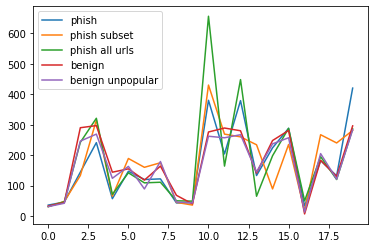

In [95]:
for i,l in enumerate(lists):
    plt.plot(l)
plt.legend(labels)

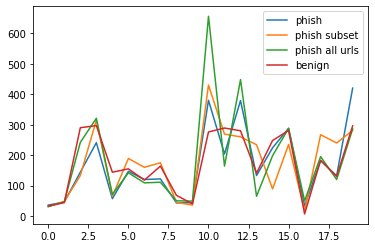

In [96]:
for i,l in enumerate(lists[:4]):
    plt.plot(l)
plt.legend(labels[:4])

In [97]:
def experiment(df,valid_only=True):

    if valid_only:
        df = df.loc[df['verCode']=='0']
        
    bef = df['notBefore']
    times = [t for t in df['time_collected']]
    time_sum = None
    diffs = []

    for i,curr in enumerate(bef):
        yr = int(curr[2:6])
        mth = int(curr[6:8])
        d = int(curr[8:10])
        h = int(curr[10:12])
        date1 = datetime.datetime(yr,mth,d,h)
        date2 = datetime.datetime.fromtimestamp(times[i])
        diff = date2-date1
        diffs.append(diff)
        if time_sum is None:
            time_sum = diff
        else:
            time_sum+=diff
    mean = time_sum/len(bef)
    #print(len(bef))
    return mean,diffs

In [98]:
lists = []
diff_lists = [[] for _ in range(10)]
for z,df in enumerate(all_dfs):
    print()
    print(labels[z])
    print()
    my_list = []
    
    for z,i in enumerate(ctr.most_common(10)):
        #print(i[0])
        subdf=df.loc[df['issuer_'+mode]==i[0]]
        l = len(subdf.loc[df['verCode']=='0'])
        #print("DF:{}".format(l))
        if l>0:
        
            mean,diffs = experiment(subdf)
            print("issuer: {} | mean: {}".format(i,mean))
            my_list.append(mean.days)
            diff_lists[z].append(diffs)
        else:
            print('all {} certs invalid'.format(len(subdf)))
            my_list.append(-1)
            diff_lists[z].append([datetime.timedelta(-5,0,0)])
    lists.append(my_list)



phish

issuer: ('R3', 1020) | mean: 36 days, 12:48:42.359929
issuer: ('cPanel, Inc. Certification Authority', 311) | mean: 46 days, 8:08:25.882932
issuer: ('Sectigo RSA Domain Validation Secure Server CA', 91) | mean: 144 days, 2:23:39.006528
issuer: ('Go Daddy Secure Certificate Authority - G2', 14) | mean: 241 days, 10:55:46.253466
issuer: ('GeoTrust TLS DV RSA Mixed SHA256 2020 CA-1', 13) | mean: 57 days, 7:35:40.463900
issuer: ('Amazon', 11) | mean: 147 days, 21:23:18.157471
issuer: ('Actalis Domain Validation Server CA G3', 9) | mean: 120 days, 6:25:48.612860
issuer: ('Encryption Everywhere DV TLS CA - G1', 7) | mean: 122 days, 23:49:11.775707
issuer: ('ZeroSSL RSA Domain Secure Site CA', 6) | mean: 43 days, 19:56:03.312352
issuer: ('GTS CA 1D2', 4) | mean: 44 days, 22:56:01.544046

phish subset

issuer: ('R3', 1020) | mean: 31 days, 2:02:24.550849
issuer: ('cPanel, Inc. Certification Authority', 311) | mean: 48 days, 2:59:34.825234
issuer: ('Sectigo RSA Domain Validation Secure 

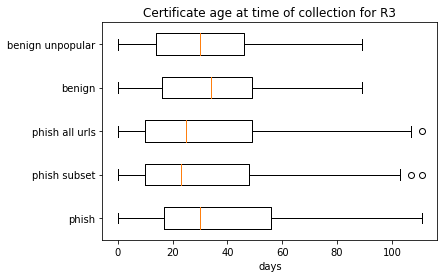

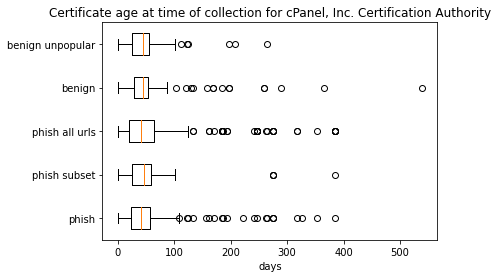

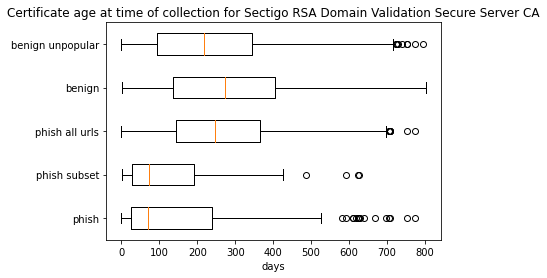

In [100]:
for z in range(3):
    k = ctr.most_common(20)[z][0]
    data = [[x.days for x in i] for i in diff_lists[z]]
    fig, ax = plt.subplots()
    ax.boxplot(data,vert=0,labels = labels)
    ax.set_title('Certificate age at time of collection for {}'.format(k))
    ax.set_xlabel('days')
